In [1]:
%matplotlib inline


# L1 Penalty and Sparsity in Logistic Regression

# Logistic回归中的L1惩罚与稀疏性

Comparison of the sparsity (percentage of zero coefficients) of solutions when L1 and L2 penalty are used for different values of C. We can see that large values of C give more freedom to the model.  Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions.
  
We classify 8x8 images of digits into two classes: 0-4 against 5-9. The visualization shows coefficients of the models for varying C. 
  
比较在L1和L2惩罚函数不同C值时，解的稀疏程度（系数为0的百分比），我们可以看到当C值越大时，模型的正则化强度越大，但相反，当C值越小时，模型的正则化强度越小，模型的约束程度越大。相同的C值下L1惩罚下，解的稀疏程度会高。  
  
我们将8x8的手写数字图片分为两类：0-4和5-9。通过可视化展现不同C值下的模型参数。


In [2]:
print(__doc__)

# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

Automatically created module for IPython interactive environment


In [3]:
# 加载手写数字数据集
digits = datasets.load_digits()

# 分别给数据集和标签集赋值X, y
X, y = digits.data, digits.target
# 将数据集标准化
X = StandardScaler().fit_transform(X)

In [4]:
# classify small against large digits
# 将标签集分为两类0-4一类，5-9一类
y = (y > 4).astype(np.int)

当C=1.00时
L1惩罚项得到的参数稀疏度: 4.69%
L1惩罚项的模型性能: 0.9087
L2惩罚项得到的参数稀疏度: 4.69%
L2惩罚项的模型性能: 0.9037
当C=0.10时
L1惩罚项得到的参数稀疏度: 26.56%
L1惩罚项的模型性能: 0.9009
L2惩罚项得到的参数稀疏度: 4.69%
L2惩罚项的模型性能: 0.9021
当C=0.01时
L1惩罚项得到的参数稀疏度: 84.38%
L1惩罚项的模型性能: 0.8620
L2惩罚项得到的参数稀疏度: 4.69%
L2惩罚项的模型性能: 0.8898


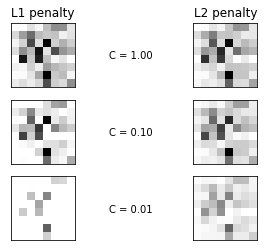

In [5]:
# Set regularization parameter
# 取不同的C值，分别取1，0.1，0.01
for i, C in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    # 根据C值得到L1惩罚模型和L2惩罚模型
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    
    # LR模型的参数向量
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm
    # 计算L1和L2惩罚下，模型参数w的稀疏度
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    
    print("当C=%.2f时" % C)
    #print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    #print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    #print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    #print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))
    print("L1惩罚项得到的参数稀疏度: %.2f%%" % sparsity_l1_LR)
    print("L1惩罚项的模型性能: %.4f" % clf_l1_LR.score(X, y))
    print("L2惩罚项得到的参数稀疏度: %.2f%%" % sparsity_l2_LR)
    print("L2惩罚项的模型性能: %.4f" % clf_l2_LR.score(X, y))
    
    # 设置图形展示位置
    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")
    
    # 展示图片，设置8*8的位图展示
    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    # 设置C值的展示位置
    plt.text(-11, 4, "C = %.2f" % C)
    
    # 不展示任何坐标轴的样式和数据
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()